<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2020/blob/master/seminar02/MLatFIAN2020_seminar02_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

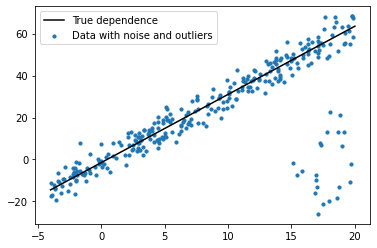

In [200]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
    x = np.random.uniform(*limits, size=N)
    y = true_function(x) + noize_function(x)  
    return x[:,None], y

X, Y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, Y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

In [207]:
%%time
def MAE(w, x, y):
    return (np.abs(w[0] + w[1]*x - y))

def grad_MAE(x, y, w):
    direct0 = (np.sign(w[0] + w[1]*x - y)).mean()
    direct1 = (x * np.sign(w[0] + w[1]*x - y)).mean()
    return np.array([direct0, direct1])

step_size = 0.01
w_fit = np.array([0.0,0.0])

for _ in range(50000):
    grad = grad_MAE(X.ravel(), Y, w_fit)
    w_fit = w_fit - step_size * grad
        


Wall time: 1.24 s


In [259]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)

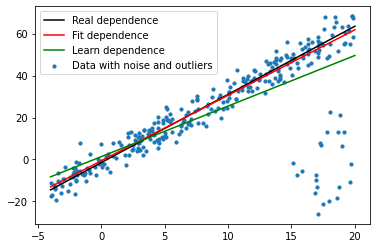

In [265]:
true_function = lambda x: 3.25 * x - 1.47
fit_function = lambda x: w_fit[0] + x * w_fit[1]
learn_function = lambda x: reg.intercept_ + x * reg.coef_

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='Real dependence')
plt.plot(x, fit_function(x), c='Red', label='Fit dependence')
plt.plot(x, learn_function(x), c='Green', label='Learn dependence')
plt.scatter(X, Y, s=10, label='Data with noise and outliers')
plt.legend();

Как видно из графика метод наименьших абсолютных ошибок лучше описывает такого вида данные, чем линейная регрессия из библиотеки sclearn. Это связано с тем, что модель линейной регрессии в библиотеке использует метод наименьших квадратов, для уменьшения ошибки, и для такого вида данных, с аномальной группой точек, эти точки сильнее влияют на ошибки для МНК, чем МАО, поэтому графики и имеют такой вид. 